In [1]:
import pandas as pd
cellFields = ['latency','volume','z','maxrate','spont','waveWidth','axon','dendrite']
generatorFields=['Type', 'transmission', 'latMean','latStd','volMean','volStd', 'zMean', 'zStd',
'maxrateMean', 'maxrateStd','spontMean','spontStd','waveWidth','waveStd','axonMean','axonStd',
'dendriteMean','dendriteStd']
Type1=[1, 1, 14, .5,  150,30,500,20,.9, .1,.02,.01, 1, .05, 160, 20, 180,30 ]  #L4 pyramid
Type2=[2, 1, 15, .5,  120,30,300,20,.8, .1,.07,.01, 1, .04, 150,   20, 150,30   ]  #L2 pyramid
Type3=[3, 0, 15, 1,   120,30, 300,20, .95,.1,.2,.1, .2,.001,150,   10, 150,10  ]  #L2 inhibitory PV
Type4=[4, 0, 17, 4, 110,30,300,20, .3, .1,.02,  .01,.3,.005,150,   10, 150,40  ]  #L2 inhibitory Som
Type5=[5, 1, 22, 5,  180,20,800,100,.35,.2,.35, .1,.5,.1,  1000, 500, 200,60  ]  #L6 excitatory pyramid
Type6=[6, 0, 14.5, .5, 100,30,500,20,.95,.1,.2,.1, .2,.001,150,   10, 150,10  ]  #L4 inhibitory FS
dftype = pd.DataFrame([Type1,Type2,Type3,Type4,Type5,Type6],columns=generatorFields)

In [2]:
import numpy as np
sataset = pd.DataFrame(columns=cellFields) #1
celltypes = pd.DataFrame(columns=['transmission']) #2
for ii in range(100): #3
  tt = np.random.randint(6) #4
  trans = dftype.ix[tt,'transmission'] #5
  latency = dftype.ix[tt,'latMean']+np.random.randn()*dftype.ix[tt]['latStd'] #5
  vol=dftype.ix[tt,'volMean']+np.random.randn()*dftype.ix[tt]['volStd'] #6
  z = dftype.ix[tt,'zMean']+np.random.randn()*dftype.ix[tt]['zStd'] #6
  maxrate = dftype.ix[tt,'maxrateMean']+np.random.randn()*dftype.ix[tt]['maxrateStd'] #6
  spont = dftype.ix[tt,'spontMean']+np.random.randn()*dftype.ix[tt]['spontStd'] #6
  waveWidth = dftype.ix[tt,'waveWidth']+np.random.randn()*dftype.ix[tt]['waveStd'] #6
  axon = dftype.ix[tt,'axonMean']+np.random.randn()*dftype.ix[tt]['axonStd'] #6
  dendrite = dftype.ix[tt,'dendriteMean']+np.random.randn()*dftype.ix[tt]['dendriteStd'] #6
  sataset=sataset.append(pd.DataFrame([[latency,vol,z,maxrate,spont,waveWidth,axon,dendrite]],columns=cellFields),ignore_index=True) #7
  celltypes = celltypes.append(pd.DataFrame([[trans]],columns=['transmission']),ignore_index=True) #8

In [3]:
sataset = (sataset - sataset.mean())/sataset.std()

In [4]:
covSATA=sataset.cov() #1

In [5]:
Eva,Eve=np.linalg.eig(covSATA) #1

In [6]:
eigenSum = np.sum(Eve) #1
print eigenSum

-3.20892190644


In [7]:
#take a look at the sata
sataset

,latency,volume,z,maxrate,spont,waveWidth,axon,dendrite
0,0.303708,-0.470930,-1.013463,-1.266944,-0.872214,-0.779773,-0.409985,-0.510941
1,0.000072,-0.098089,-0.890727,0.341265,-0.694620,-1.045528,-0.387351,-0.217346
2,-0.367438,-1.732354,-0.899777,0.481544,-0.565764,1.098879,-0.381391,0.642130
3,-0.483341,-1.008220,-0.671874,0.716014,0.090685,-1.053818,-0.387879,-0.649509
4,0.077911,-1.382183,-0.799467,0.168889,0.187297,-1.048668,-0.429622,-0.394772
5,1.725166,1.388507,1.607993,-1.442189,1.686644,-0.616889,4.284395,-0.083919
6,-0.166917,0.334443,-0.829336,0.381534,-0.749411,1.199871,-0.391571,0.236761
7,-0.275106,-0.913881,-0.826845,0.307153,-0.507049,1.155751,-0.388821,0.300141
8,-2.267358,0.075151,-0.872000,-0.716278,-0.929273,-0.777781,-0.422581,-0.676326
9,0.106279,-0.788873,-0.823062,-1.376241,-1.056866,-0.759776,-0.380255,0.216742


In [8]:
# take a loot at the y training sata
celltypes

,transmission
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,0.0
9,0.0


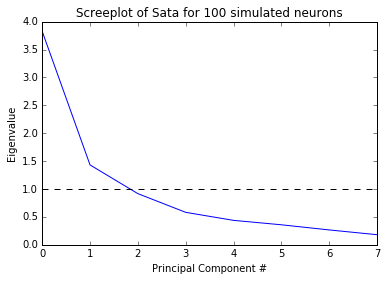

In [9]:
from sklearn.decomposition import PCA #1
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA() #2
trainPercent = 100 #3
trainNum = int(len(sataset)*trainPercent/100.) #4
xTrain = pca.fit_transform(sataset[:trainNum]) #5
yTrain = celltypes[:trainNum] #6
yTrain = [_[0] for _ in np.array(yTrain)] #7
plt.plot(pca.explained_variance_ratio_*8) #8
plt.axhline(1,c='k',ls='--') #9
plt.title('Screeplot of Sata for 100 simulated neurons') #10
plt.ylabel('Eigenvalue') #10
plt.xlabel('Principal Component #') #10

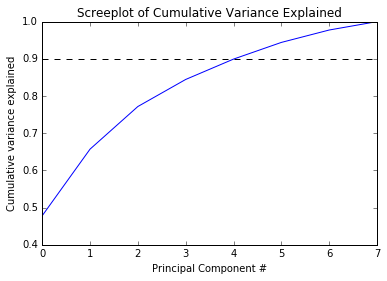

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #1
plt.axhline(.9,c='k',ls='--') #2
plt.title('Screeplot of Cumulative Variance Explained') #3
plt.ylabel('Cumulative variance explained')
plt.xlabel('Principal Component #')

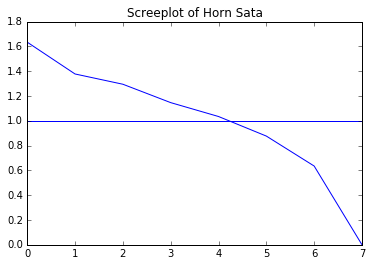

In [11]:
hornmat = np.array(np.random.randn(8,100)) #1
pca = PCA() #2
trainPercent = 100 #3
trainNum = int(len(hornmat)*trainPercent/100.) #4
xTrain = pca.fit_transform(hornmat[:trainNum]) #5
yTrain = celltypes[:trainNum] #6
yTrain = [_ for _ in np.array(yTrain)] #7
plt.plot(pca.explained_variance_ratio_*8) #8
plt.axhline(1) #9
plt.title('Screeplot of Horn Sata') #10

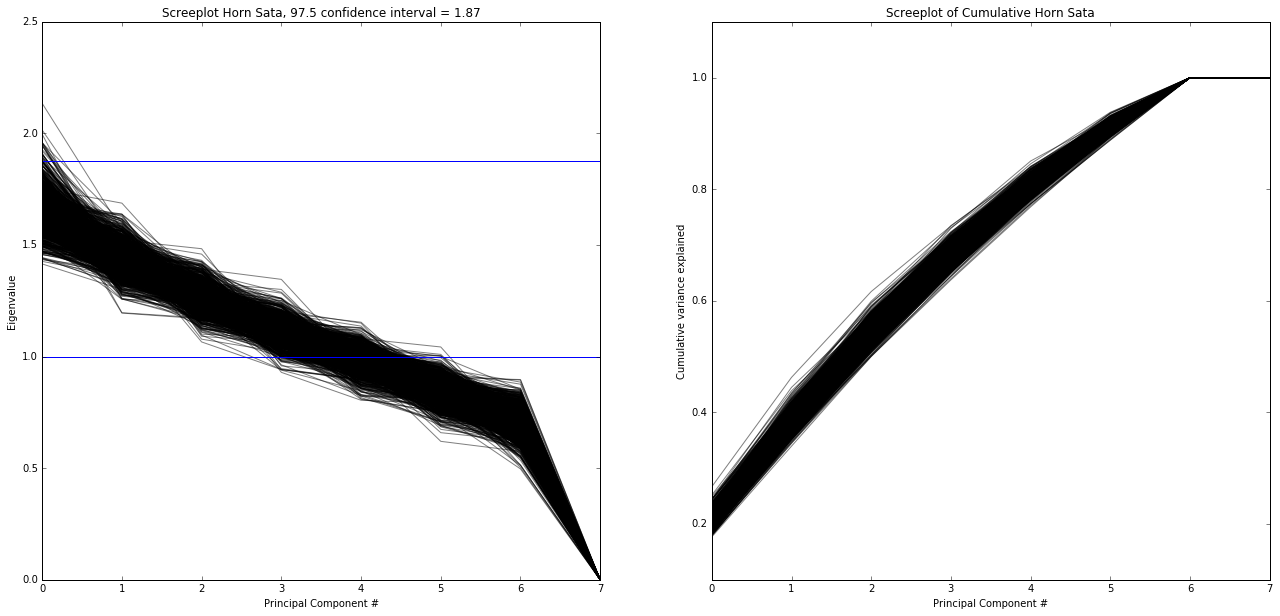

In [12]:
fig = plt.figure(figsize=(22,10)) #1
ax = plt.subplot(121);ax2 = plt.subplot(122)#2
firstPC = [] #3
for hornNum in range(1000): #4
    hornmat = np.array(np.random.randn(8,100))#5
    pca = PCA() #6
    trainPercent = 100 #7
    trainNum = int(len(hornmat)*trainPercent/100.) #8
    xTrain = pca.fit_transform(hornmat[:trainNum]) # 9
    yTrain = celltypes[:trainNum] # 10
    yTrain = [_[0] for _ in np.array(yTrain)] #11
    explained = pca.explained_variance_ratio_*8 #12
    firstPC.append(explained[0]) #13
    ax.plot(explained,alpha=0.5,c='k') #14
    ax2.plot(np.cumsum(pca.explained_variance_ratio_),alpha=0.5,c='k') #15
ax.axhline(1) #16
hornconf=sorted(firstPC)[975] #17
ax.axhline(hornconf) #18
ax.set_title('Screeplot Horn Sata, 97.5 confidence interval = '+str(hornconf)[:4]) #19
ax.set_xlabel('Principal Component #') #20
ax.set_ylabel('Eigenvalue') #20
ax2.set_title('Screeplot of Cumulative Horn Sata') #20
ax2.set_xlabel('Principal Component #') #20

ax2.set_ylabel('Cumulative variance explained') #20
plt.savefig('Screeplot of Horn Sata 1000 trials.png',dpi=300) #21

(-6.0, 3.0, -3.0, 4.0)

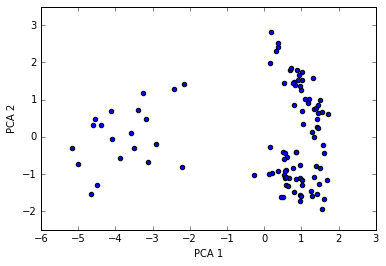

In [13]:
rotatedSataArray = np.dot(np.array(sataset),Eve); #2, no need to flip in Python
plt.figure() #3
plt.scatter(rotatedSataArray[:,0],rotatedSataArray[:,1]) #4
plt.xlabel('PCA 1'); plt.ylabel('PCA 2') #5
plt.axis('equal') #6

(-6.0, 3.0, -3.0, 4.0)

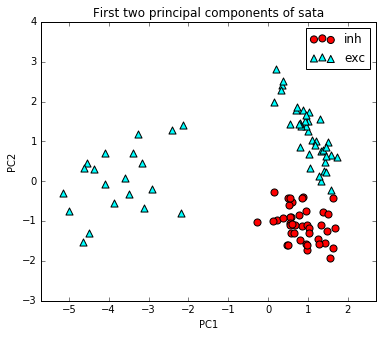

In [14]:
fig=plt.figure(figsize=(6,5)) #1
markershape = ['o','^'] # circle and triangle #2
markercolor = ['red','cyan'] #3
markerlabel = ['inh','exc'] #4
yTrain = np.array(celltypes['transmission'])
for yind,yval in enumerate(set(yTrain)): #5
    plt.scatter(rotatedSataArray[yTrain==yval,0],\
                rotatedSataArray[yTrain==yval,1],\
                c=markercolor[yind],marker=markershape[yind],label=markerlabel[yind],s=50) #6
plt.xlabel('PC1') #7
plt.ylabel('PC2') #7
plt.title('First two principal components of sata') #8
plt.legend() #9
plt.axis('equal')#10

In [15]:
# NOW BEGIN DEMO FOR CHAPTER 9

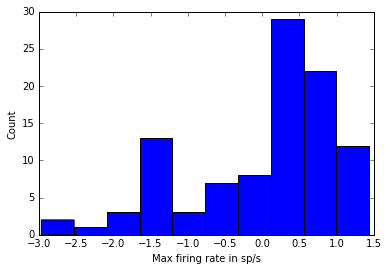

In [18]:
f = plt.figure() #1
plt.hist(sataset['maxrate']) #2
plt.xlabel('Max firing rate in sp/s') #3
plt.ylabel('Count')#3

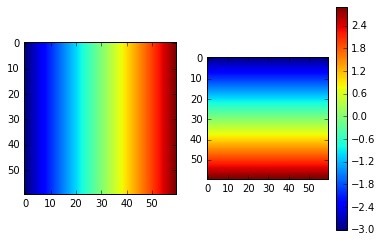

In [19]:
X,Y = np.meshgrid(np.arange(-3,3,.1), np.arange(-3,3,.1)); #1
f=plt.figure #2
plt.subplot(1,2,1) #2
plt.imshow(X) #3
plt.subplot(1,2,2) #4
plt.imshow(Y) #5
plt.colorbar() #6

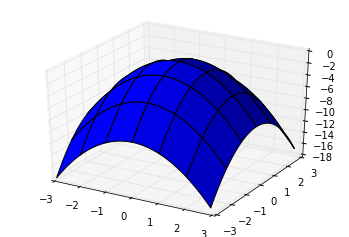

In [20]:
from mpl_toolkits.mplot3d import Axes3D #0
Z = -1.*(X**2 + Y**2); #1
fig = plt.figure() #2
ax = fig.add_subplot(111, projection='3d')
h = ax.plot_surface(X,Y,Z) #3

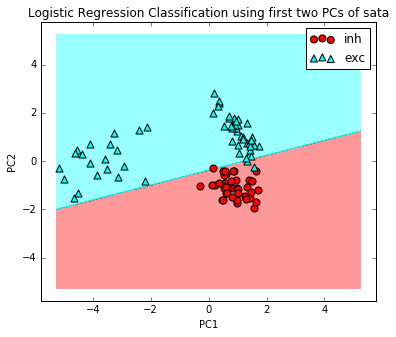

In [37]:
from sklearn.linear_model import LogisticRegression #1
from matplotlib.colors import ListedColormap #2
logRegression = LogisticRegression() #3
logRegression.fit(rotatedSataArray[:,:2],yTrain) #4
fig=plt.figure(figsize=(6,5)) #5
markershape = ['o','^'] #6
markercolor = ['red','cyan'] #7
markerlabel = ['inh','exc'] #8
gridRes=.02 #9
xTrain = np.array(rotatedSataArray[:,:2])
cmap = ListedColormap(markercolor) #10
maxval = max(-1*xTrain.min(),xTrain.max())+.1 #11
minval = -maxval #12
xgrid,ygrid=np.meshgrid(np.arange(minval,maxval,gridRes),np.arange(minval,maxval,gridRes)) #13
Z = logRegression.predict(np.array([xgrid.flatten(),ygrid.flatten()]).T) #14
Z = Z.reshape(xgrid.shape) #15
plt.contourf(xgrid,ygrid,Z,alpha=0.4,cmap=cmap) #16
for yind,yval in enumerate(set(yTrain)): #17
    plt.scatter(x=xTrain[yTrain==yval,0], y=xTrain[yTrain==yval,1], c=markercolor[yind],\
    marker=markershape[yind], label=markerlabel[yind],s=50) #18
plt.xlabel('PC1');plt.ylabel('PC2') #19
plt.title('Logistic Regression Classification using first two PCs of sata') #20
plt.legend() #21

In [38]:
#rotatedSataArray[:,:2]

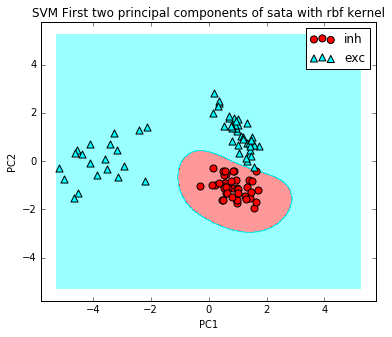

In [39]:
from sklearn import svm #1
clf = svm.SVC() #2
clf.fit(xTrain, yTrain)#3
fig=plt.figure(figsize=(6,5)) #4
markershape = ['o','^'] # 5
markercolor = ['red','cyan'] #6
markerlabel = ['inh','exc'] #7
gridRes=.02 #8
cmap = ListedColormap(markercolor[:len(set(yTrain))]) #9
maxval = max(-1*xTrain.min(),xTrain.max())+.1 #10
minval = -maxval #11
xgrid,ygrid=np.meshgrid(np.arange(minval,maxval,gridRes),np.arange(minval,maxval,gridRes)) #12
Z = clf.predict(np.array([xgrid.flatten(),ygrid.flatten()]).T) #13
Z = Z.reshape(xgrid.shape) #14
plt.contourf(xgrid,ygrid,Z,alpha=0.4,cmap=cmap) #15
for yind,yval in enumerate(set(yTrain)): #16
    plt.scatter(x=xTrain[yTrain==yval,0], y=xTrain[yTrain==yval,1], c=markercolor[yind],\
    marker=markershape[yind], label=markerlabel[yind],s=50) #17
plt.xlabel('PC1');plt.ylabel('PC2')#18
plt.title('SVM First two principal components of sata with '+clf.kernel+' kernel') #19
plt.legend() #20

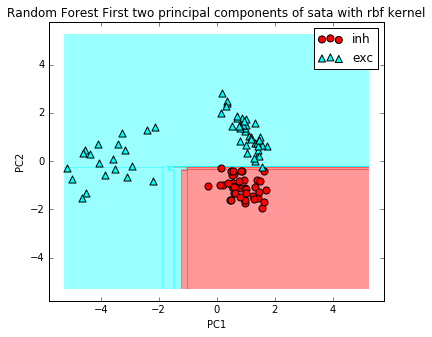

In [44]:
from sklearn.ensemble import RandomForestRegressor #1
regressor = RandomForestRegressor(n_estimators=10, min_samples_split=2) #2
regressor.fit(xTrain, yTrain) #3
fig=plt.figure(figsize=(6,5))
markershape = ['o','^'] # circle and triangle
markercolor = ['red','cyan']
markerlabel = ['inh','exc']
gridRes =.05
cmap = ListedColormap(markercolor[:len(set(yTrain))])
maxval = max(-1*xTrain.min(),xTrain.max())+.1
minval = -maxval
xgrid,ygrid=np.meshgrid(np.arange(minval,maxval,gridRes),np.arange(minval,maxval,gridRes))
Z = regressor.predict(np.array([xgrid.flatten(),ygrid.flatten()]).T)
Z = Z.reshape(xgrid.shape)
plt.contourf(xgrid,ygrid,Z,alpha=0.4,cmap=cmap)
for yind,yval in enumerate(set(yTrain)): 
    plt.scatter(x=xTrain[yTrain==yval,0], y=xTrain[yTrain==yval,1], c=markercolor[yind], marker=markershape[yind],label=markerlabel[yind],s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Random Forest First two principal components of sata with '+clf.kernel+' kernel') 
plt.legend()
plt.savefig('Figure 9.10. Random Forest Regression of first two principal components of 100 neuron sata.png',dpi=300)